In [ ]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import re

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)

#response = requests.get('https://www.baseball-reference.com/players/g/gonzaad01.shtml')

#soup = BeautifulSoup(response.text, 'html5lib')

player_list = []
batting_stats = []
player_name = ''
player_salary = ''
team_list = []

def page_scrape(url):
    driver.get(url)

    soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    return soup

def get_team(url):
    response = requests.get(url)
    
    soup = BeautifulSoup(response.text, 'html5lib')
    
    url_origin = 'http://www.baseball-reference.com'
    
    team_urls = []
    
    standings_html = soup.find(string=re.compile('id="expanded_standings_overall"'))
    standings_soup = BeautifulSoup(standings_html, "html.parser")
    standings_table = standings_soup.find('tbody')
    
    links = standings_table.find_all('a')
    
    for link in links:
        team_urls.append(url_origin + link.get('href'))
    
    return team_urls


def get_player(url):
    response = requests.get(url)
    
    soup = BeautifulSoup(response.text, 'html5lib')
    
    url_origin = 'http://www.baseball-reference.com'
    
    player_urls = []
    
    forty_man_html = soup.find(string=re.compile('id="the40man"'))
    forty_man_soup = BeautifulSoup(forty_man_html, "html.parser")
    forty_man_table = forty_man_soup.find('tbody')
    
    player_row = forty_man_table.find('td', {'data-row':"0"})
    
    links = forty_man_table.find_all('a')
    
    for link in links:
        player_urls.append(url_origin + link.get('href'))
    
    return player_urls

def get_2018_salary(soup, year):
    if soup.find('div', id="div_br-salaries") is not None:
        salary_table = soup.find('div', id="div_br-salaries")
        if salary_table.find('td', {'data-year':"2018"}) is not None:
            return salary_table.find('td', {'data-year':"2018"}).text


def get_full_name(soup):
    if soup.find('div', id='meta') is not None:
        player_info_table = soup.find('div', id='meta')
        return player_info_table.find('h1', itemprop="name").text


def get_batting_standard_table(soup):
    if soup.find('table', id='batting_standard') is not None:
        standard_batting_table = soup.find('table', id='batting_standard')
        return standard_batting_table
    else:
        return None


def get_batting_stats(soup):
    if soup is not None:
        table_body = soup.find('tbody')
        for row_year in table_body.find_all('tr', class_="full"):
            year_id = row_year.find('th').text
            actual_info = [e.text for e in row_year.find_all('td')]
            actual_info.insert(0, year_id)
            actual_info.insert(0, player_full_name)
            actual_info.insert(-1, player_dWAR)
            actual_info.insert(-1, player_salary)
            batting_stats.append(actual_info)
    
        return batting_stats
    else:
        pass

def get_player_dWAR(soup):
    player_dwars = []
    if soup.find('table', id='batting_value') is not None:
        batting_value_table = soup.find('table', id='batting_value')
        if batting_value_table.find('tr', id='batting_value.2011') is not None:
            year_2011 = batting_value_table.find('tr', id='batting_value.2011')
            if year_2011.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2011.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2012') is not None:
            year_2012 = batting_value_table.find('tr', id='batting_value.2012')
            if year_2012.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2012.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2013') is not None:
            year_2013 = batting_value_table.find('tr', id='batting_value.2013')
            if year_2013.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2013.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2014') is not None:
            year_2014 = batting_value_table.find('tr', id='batting_value.2014')
            if year_2014.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2014.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2015') is not None:
            year_2015 = batting_value_table.find('tr', id='batting_value.2015')
            if year_2015.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2015.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2016') is not None:
            year_2016 = batting_value_table.find('tr', id='batting_value.2016')
            if year_2016.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2016.find('td', {'data-stat':"WAR_def"}).text)
        if batting_value_table.find('tr', id='batting_value.2017') is not None:
            year_2017 = batting_value_table.find('tr', id='batting_value.2017')
            if year_2017.find('td', {'data-stat':"WAR_def"}).text != '':
                player_dwars.append(year_2017.find('td', {'data-stat':"WAR_def"}).text)       
    
    
    player_dwars = [float(i) for i in player_dwars]
    player_dWAR = float(sum(player_dwars)) / max(len(player_dwars), 1)
    return player_dWAR 
    
        
for team in get_team('https://www.baseball-reference.com/leagues/MLB-standings.shtml'):
    for player in get_player(team):
        player_list.append(player)

    
for player in player_list:
    player_soup = page_scrape(player)
    player_full_name = get_full_name(player_soup)
    player_dWAR = get_player_dWAR(player_soup)
    player_salary = get_2018_salary(player_soup, 2018)
    standard_batting = get_batting_standard_table(player_soup)
    get_batting_stats(standard_batting)
    time.sleep(1)

In [ ]:
player_full_name

In [ ]:
all_top40 = pd.DataFrame(batting_stats, columns=['Player_Name','Year','Age','Team','League',
                                                        'Games_Played','Plate_Appearances','At_Bats',
                                                        'Runs','Hits','2B','3B','HR','RBI','SB','CS',
                                                        'BB','SO','BA','OBP','SLG','OPS','OPS+','TB',
                                                        'GDP','HBP','SH','SF','IBB','Pos','dWAR','Salary', 'Awards'])

In [ ]:
import pickle

with open('all_top40.pkl', 'wb') as picklefile:
    pickle.dump(all_top40, picklefile)

In [ ]:
## BELOW IS FROM ANALYSIS NOTEBOOK

In [2]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [3]:
## NO PITCHERS

df2 = df2[df2['Pos'] != '1']

In [4]:
df2.shape

(340, 28)

In [5]:
#NO ROOKIES, BETTER FOR LINEAR TRANSFORMATION, NOT LOG

df2 = df2[(df2['Total_games_played'] > 162) & (df2['OPS'] < 1) & (df2['Salary'] > 500000) & (df2['Age'] > 25)]

In [6]:
df2.shape

(210, 28)

In [7]:
df3 = df2.copy(deep=True)

In [8]:
X=patsy.dmatrix('Pos',data=df3,return_type='dataframe')
X.head()

Intercept  Pos[T.3]  Pos[T.4]  Pos[T.5]  Pos[T.6]  Pos[T.7]  \
Player_Name                                                                    
A.J. Ellis             1.0       0.0       0.0       0.0       0.0       0.0   
A.J. Pollock           1.0       0.0       0.0       0.0       0.0       0.0   
Aaron Altherr          1.0       0.0       0.0       0.0       0.0       0.0   
Aaron Hicks            1.0       0.0       0.0       0.0       0.0       0.0   
Abraham Almonte        1.0       0.0       0.0       0.0       0.0       0.0   

                 Pos[T.8]  Pos[T.9]  Pos[T.D]  
Player_Name                                    
A.J. Ellis            0.0       0.0       0.0  
A.J. Pollock          1.0       0.0       0.0  
Aaron Altherr         0.0       1.0       0.0  
Aaron Hicks           1.0       0.0       0.0  
Abraham Almonte       1.0       0.0       0.0

In [9]:
df3=df3.join(X)

In [10]:
df3['First_Base'] = df3['Pos[T.3]']
df3['Second_Base'] = df3['Pos[T.4]']
df3['Third_Base'] = df3['Pos[T.5]']
df3['Shortstop'] = df3['Pos[T.6]']
df3['Left_Field'] = df3['Pos[T.7]']
df3['Center_Field'] = df3['Pos[T.8]']
df3['Right_Field'] = df3['Pos[T.9]']
df3['DH'] = df3['Pos[T.D]']

df3 = df3.drop(['Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df3

index  Games_Played  Plate_Appearances     At_Bats  \
Player_Name                                                              
A.J. Ellis            1.0     78.571429         282.714286  239.428571   
A.J. Pollock          3.0     87.333333         341.166667  310.666667   
Aaron Altherr         5.0     51.250000         201.250000  178.000000   
Aaron Hicks           7.0     91.600000         330.000000  289.400000   
Abraham Almonte      12.0     60.400000         189.800000  172.400000   
Adam Duvall          15.0     90.500000         351.000000  319.000000   
Adam Eaton           16.0     90.666667         403.333333  356.833333   
Adam Jones           19.0    152.571429         653.428571  610.571429   
Adeiny Hechavarria   28.0    119.500000         447.166667  418.833333   
Adrian Beltre        31.0    139.857143         590.142857  537.285714   
Albert Pujols        34.0    145.285714         629.428571  571.142857   
Alcides Escobar      35.0    157.857143         640.142857  598.142857   
Aledmys Diaz         37.0     95.000000         380.500000  345.000000   
Alex Avila           39.0    102.714286         375.000000  315.571429   
Alex Gordon          42.0    143.428571         603.285714  532.000000   
Andrelton Simmons    48.0    130.166667         521.500000  480.666667   
Andrew McCutchen     54.0    154.857143         669.000000  575.714286   
Andrew Romine        56.0     72.000000         168.571429  152.571429   
Anthony Rendon       63.0    126.800000         536.800000  470.000000   
Anthony Rizzo        64.0    129.714286         556.428571  476.571429   
Asdrubal Cabrera     72.0    142.142857         588.571429  532.142857   
Austin Romine        78.0     36.500000         101.833333   93.833333   
Avisail Garcia       80.0     90.833333         352.000000  324.500000   
Ben Zobrist          84.0    145.285714         622.285714  536.428571   
Billy Hamilton       85.0    107.400000         436.000000  397.400000   
Brad Miller          95.0    121.000000         450.200000  399.400000   
Brandon Belt        100.0    116.571429         449.857143  391.000000   
Brandon Crawford    101.0    136.142857         509.142857  457.000000   
Brandon Guyer       104.0     69.000000         211.000000  182.833333   
Brett Gardner       114.0    131.142857         548.857143  478.142857   
...                   ...           ...                ...         ...   
Sandy Leon          716.0     39.666667         136.500000  122.000000   
Scooter Gennett     717.0    119.400000         426.800000  397.400000   
Scott Schebler      720.0     80.666667         284.333333  255.333333   
Sean Rodriguez      724.0    109.714286         284.857143  251.714286   
Shin-Soo Choo       732.0    123.285714         540.571429  458.857143   
Starlin Castro      736.0    147.000000         620.142857  583.000000   
Starling Marte      737.0    112.666667         465.666667  424.833333   
Stephen Piscotty    738.0    107.666667         435.333333  385.333333   
Steve Pearce        741.0     75.142857         255.571429  225.857143   
Steven Souza Jr.    744.0     99.750000         384.250000  337.250000   
Tim Beckham         754.0     72.000000         255.250000  235.250000   
Todd Frazier        758.0    134.000000         538.000000  477.857143   
Tommy La Stella     761.0     68.250000         188.750000  164.750000   
Tommy Pham          762.0     66.000000         222.000000  189.500000   
Travis Shaw         769.0    118.000000         461.333333  414.666667   
Tucker Barnhart     778.0     84.500000         294.250000  260.750000   
Tyler Flowers       786.0     85.000000         293.571429  262.571429   
Tyler Saladino      792.0     80.000000         284.666667  262.333333   
Victor Martinez     798.0    139.333333         572.333333  515.166667   
Whit Merrifield     810.0    113.000000         481.000000  449.000000   
Wil Myers           811.0    109.400000         462.400000  410.200000   
Wilson Ramos        817.

In [11]:
batters_only = df3.copy(deep=True)

In [12]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

Text(0.5,1,'Player Salaries Per Position')

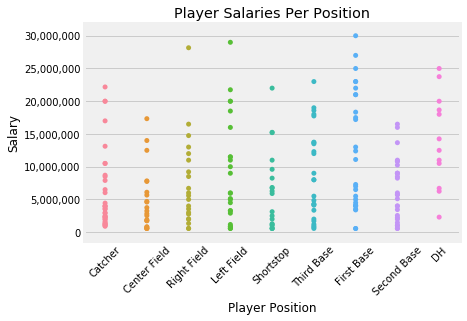

In [13]:
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
positions = ['Catcher', 'Center Field', 'Right Field', 'Left Field','Shortstop','Third Base','First Base', 'Second Base', 'DH']
y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']

sns.stripplot(x="Pos", y="Salary", data=batters_only)
plt.xlabel('Player Position')
plt.xticks(x_ticks, positions, rotation=45)
plt.yticks(y_ticks, salaries)
plt.title("Player Salaries Per Position")

Text(0.5,1,'Player Salaries Per Team')

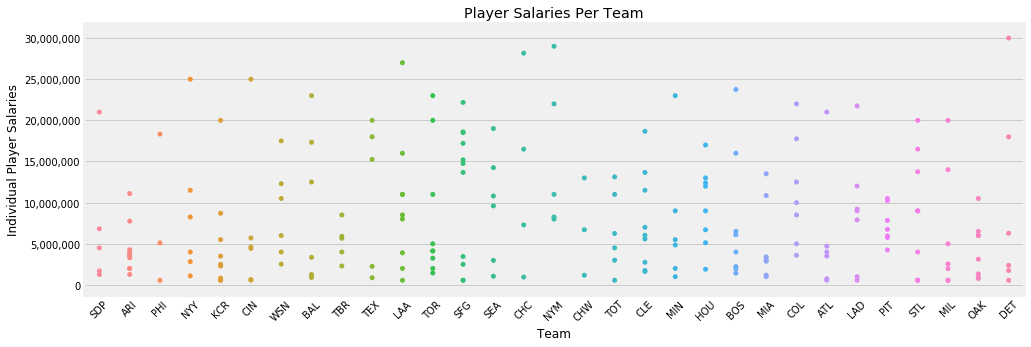

In [14]:
y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']

fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Salary", data=batters_only, ax=ax)
plt.xticks(rotation=45)
plt.ylabel('Individual Player Salaries')
plt.yticks(y_ticks, salaries)
plt.title("Player Salaries Per Team")

In [15]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Salary']]

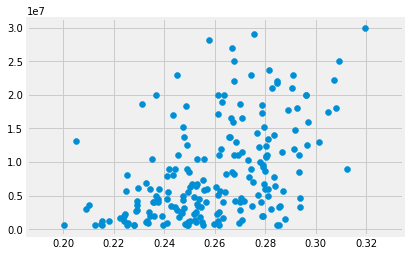

In [16]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])

In [17]:
training_df = batters_only_df.copy(deep=True)

In [18]:
training_df.describe()

Runs        Hits     Doubles     Triples          HR         RBI  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean    51.583215  101.150389   20.066325    2.230068   12.935372   48.941348   
std     20.684818   37.920569    8.042511    1.601319    8.040475   22.510261   
min      7.000000   16.500000    3.200000    0.000000    0.833333    7.666667   
25%     35.857143   71.488095   13.714286    0.892857    6.892857   32.050000   
50%     51.550000  102.800000   20.750000    2.000000   11.414286   46.916667   
75%     67.285714  130.000000   25.964286    3.333333   17.276786   64.598214   
max    101.714286  181.500000   38.714286    8.142857   35.428571  104.857143   

               BA         OBP         SLG         OPS      ...       \
count  202.000000  202.000000  202.000000  202.000000      ...        
mean     0.259753    0.324591    0.416724    0.741316      ...        
std      0.023463    0.027517    0.052271    0.071554      ...        
min      0.200174    0.256443    0.285281    0.541724      ...        
25%      0.243691    0.308513    0.382886    0.691596      ...        
50%      0.261140    0.323008    0.417559    0.743785      ...        
75%      0.278834    0.342205    0.448053    0.784688      ...        
max      0.319681    0.437400    0.557986    0.961231      ...        

       All_star_count  First_Base  Second_Base  Third_Base   Shortstop  \
count      202.000000  202.000000   202.000000  202.000000  202.000000   
mean         0.950495    0.128713     0.133663    0.123762    0.094059   
std          1.344798    0.335714     0.341136    0.330128    0.292637   
min          0.000000    0.000000     0.000000    0.000000    0.000000   
25%          0.000000    0.000000     0.000000    0.000000    0.000000   
50%          0.000000    0.000000     0.000000    0.000000    0.000000   
75%          1.000000    0.000000     0.000000    0.000000    0.000000   
max          6.000000    1.000000     1.000000    1.000000    1.000000   

       Left_Field  Center_Field  Right_Field          DH        Salary  
count  202.000000    202.000000   202.000000  202.000000  2.020000e+02  
mean     0.123762      0.099010     0.099010    0.059406  8.368710e+06  
std      0.330128      0.299417     0.299417    0.236970  7.133741e+06  
min      0.000000      0.000000     0.000000    0.000000  5.590000e+05  
25%      0.000000      0.000000     0.000000    0.000000  2.600000e+06  
50%      0.000000      0.000000     0.000000    0.000000  6.000000e+06  
75%      0.000000      0.000000     0.000000    0.000000  1.247500e+07  
max      1.000000      1.000000     1.000000    1.000000  3.000000e+07  

[8 rows x 26 columns]

In [19]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH',
       'Salary'],
      dtype='object')

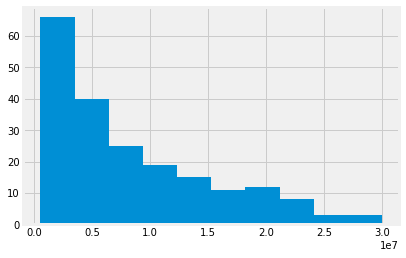

In [20]:
training_df.Salary.hist()

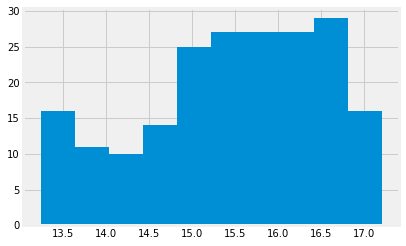

In [21]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [22]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

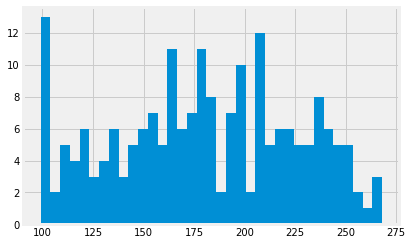

In [23]:
pd.Series(y_transformed).hist(bins=35)

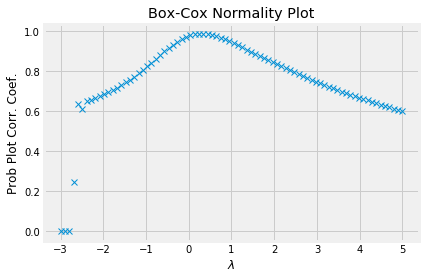

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.2935990247277316


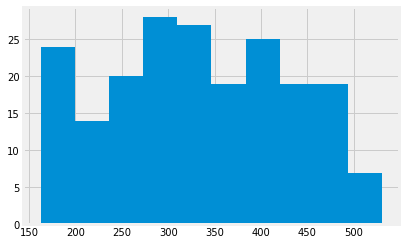

In [25]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t'] =(np.power(training_df.Salary,lamb)-1)/lamb

plt.hist(training_df['y_t']);

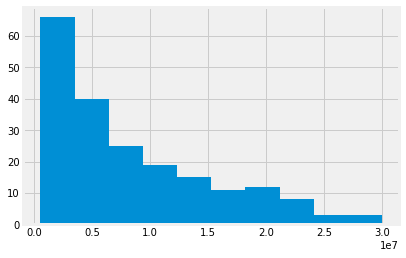

In [26]:
## CHECK THAT REVERSE BOXCOX WORKS CORRECTLY

from scipy.special import inv_boxcox

training_df['real_salary'] = inv_boxcox(training_df['y_t'], lamb)
training_df.real_salary.hist()

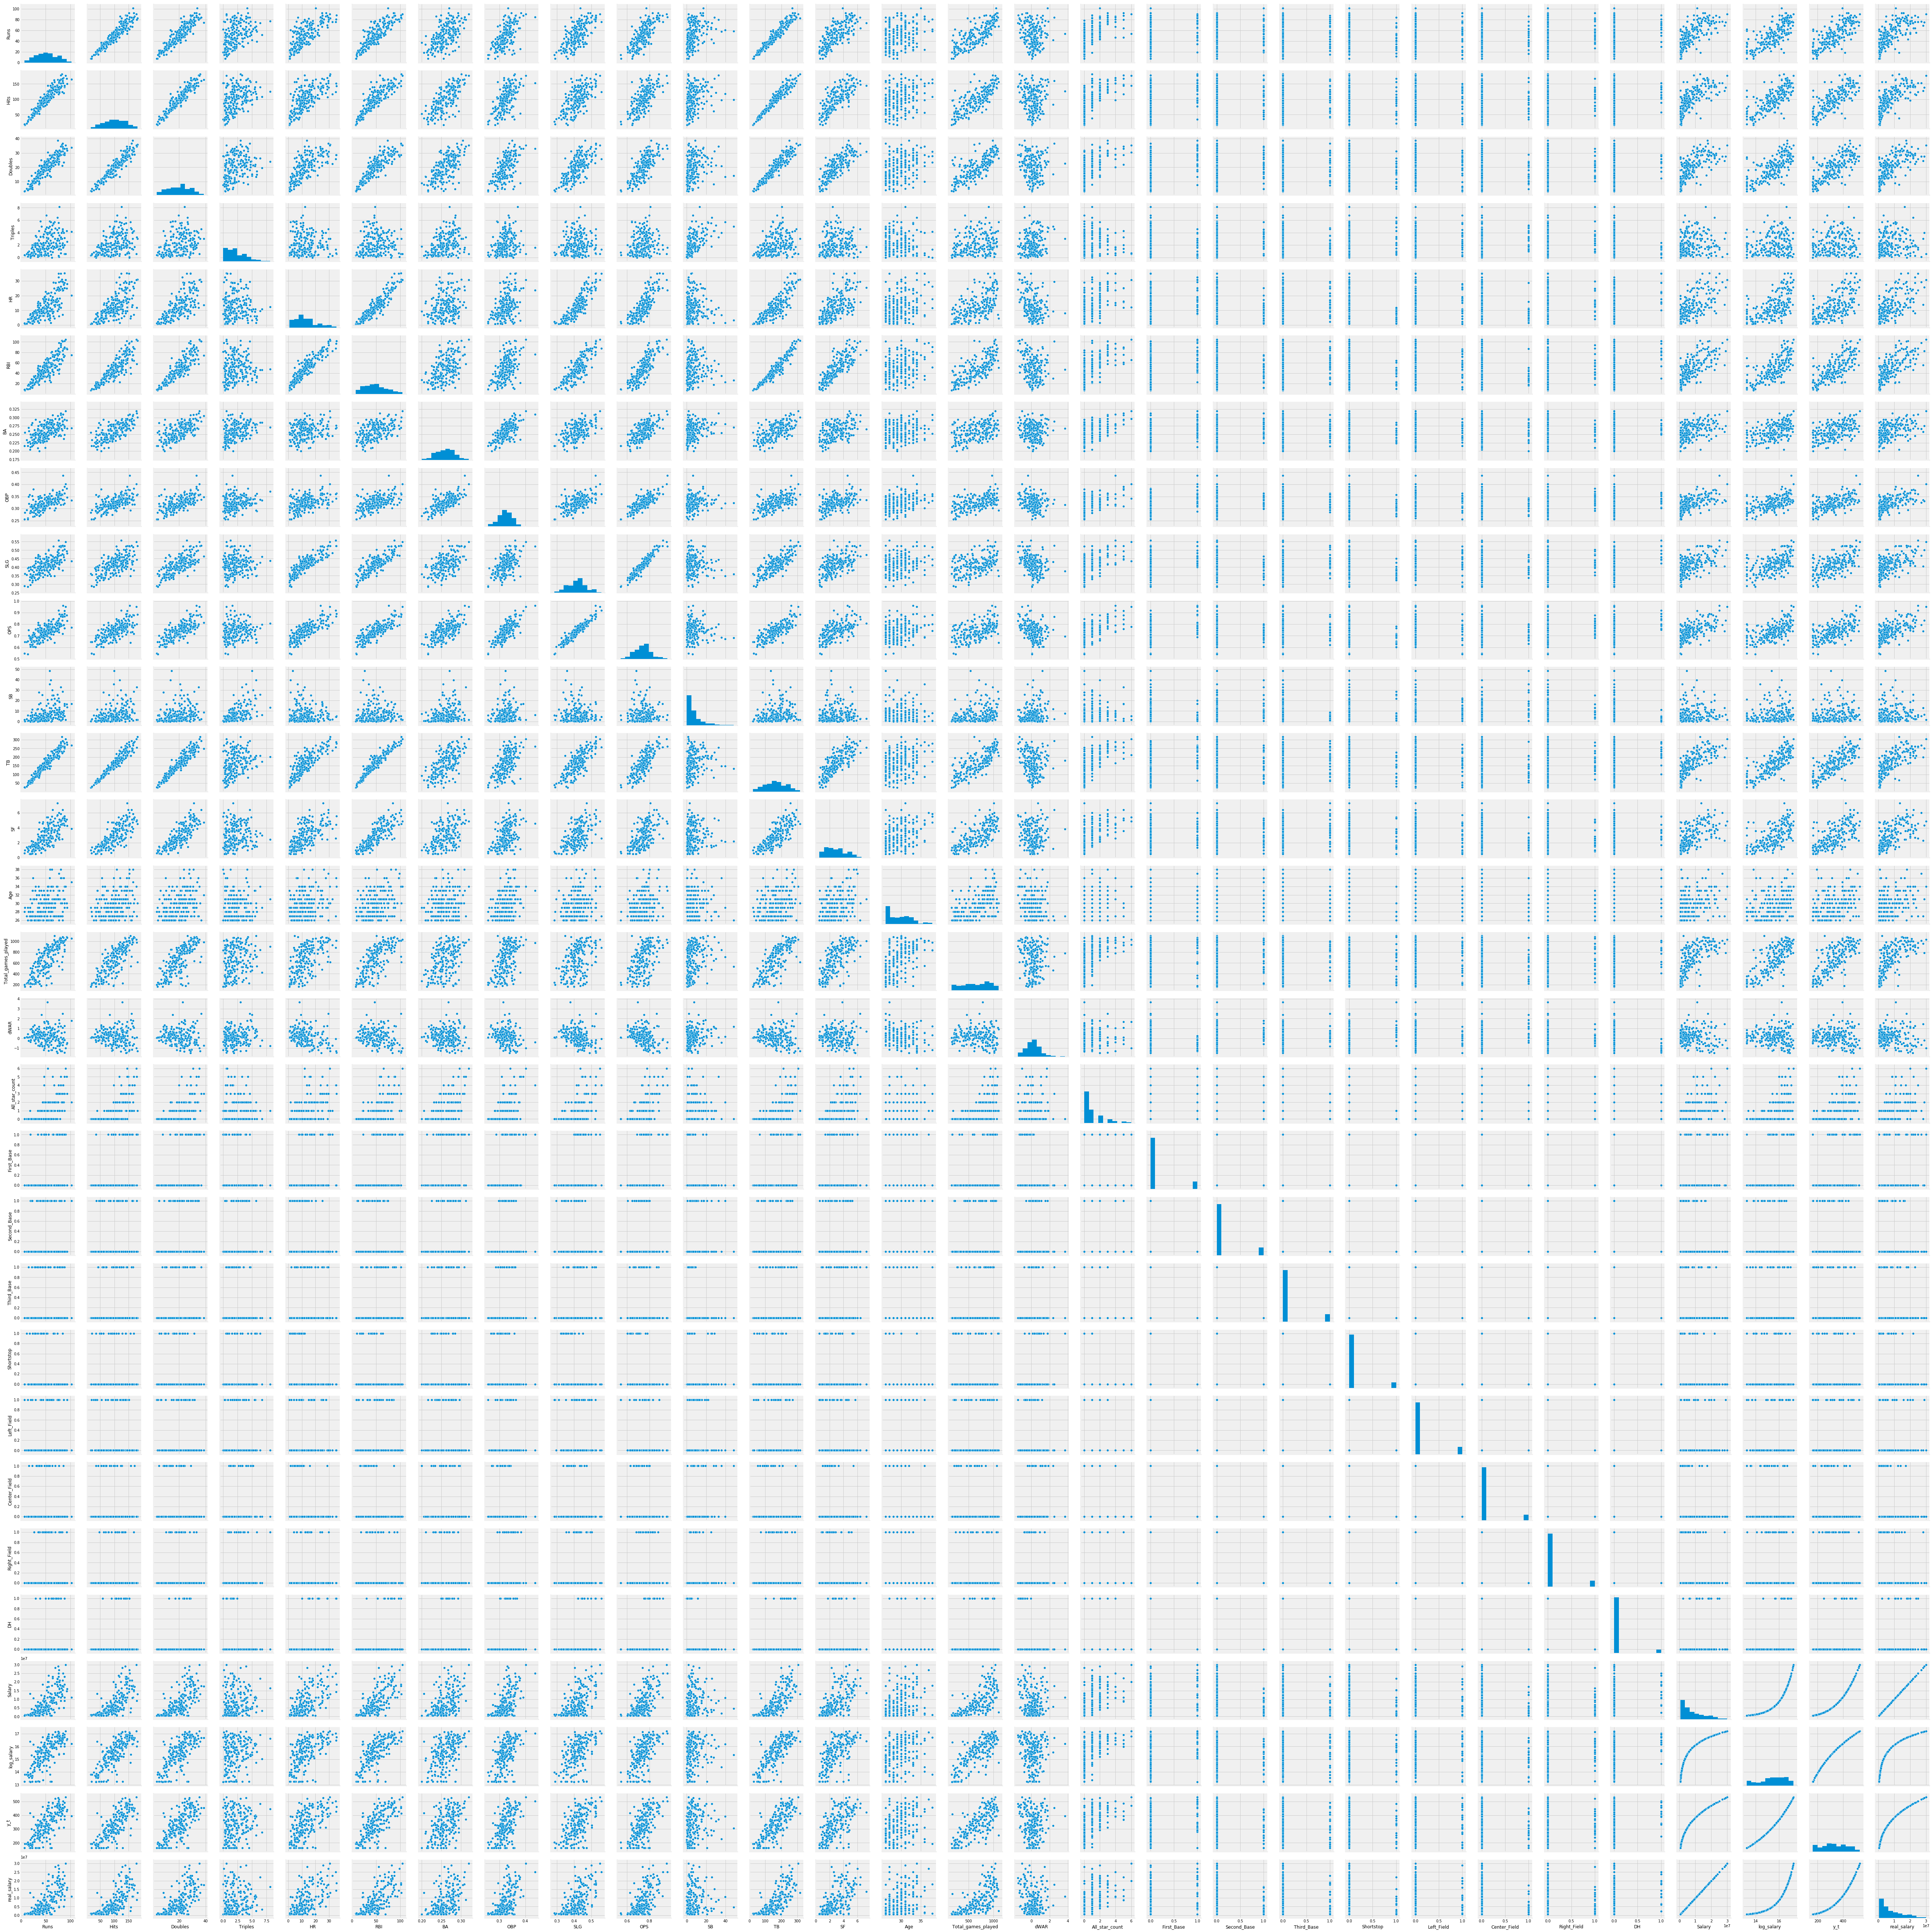

In [27]:
sns.pairplot(training_df)

In [28]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

([<matplotlib.axis.YTick at 0x1c3803d6a0>,
 <a list of 7 Text yticklabel objects>)

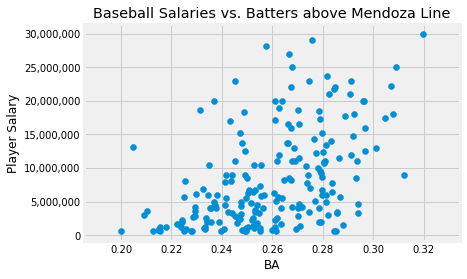

In [29]:
import matplotlib.style as style


y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']
plt.scatter(training_df['BA'], training_df['Salary'])
plt.title('Baseball Salaries vs. Batters above Mendoza Line')
plt.ylabel('Player Salary')
plt.xlabel('BA');
plt.yticks(y_ticks, salaries)

In [30]:
#X2=patsy.dmatrix('Team',data=training_df,return_type='dataframe')
#X2.head()

In [31]:
#training_df=training_df.join(X2)

In [32]:
#training_df['LAA'] = training_df['Team[T.LAA]']
#training_df['LAD'] = training_df['Team[T.LAD]']
#training_df['PIT'] = training_df['Team[T.PIT]']
#training_df['SDP'] = training_df['Team[T.SDP]']
#training_df['STL'] = training_df['Team[T.STL]']
#training_df['TBR'] = training_df['Team[T.TBR]']
#training_df['TOR'] = training_df['Team[T.TOR]']
#training_df['WSN'] = training_df['Team[T.WSN]']
#training_df['SFG'] = training_df['Team[T.SFG]']
#training_df['NYM'] = training_df['Team[T.NYM]']
#training_df['MIA'] = training_df['Team[T.MIA]']


#training_df = training_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
#                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
#                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]','Team[T.NYM]','Team[T.MIA]'],1)

In [33]:
#training_df['ATL'] = training_df['Team[T.ATL]']
#training_df['BAL'] = training_df['Team[T.BAL]']
#training_df['BOS'] = training_df['Team[T.BOS]']
#training_df['CHC'] = training_df['Team[T.CHC]']
#training_df['CHW'] = training_df['Team[T.CHW]']
#training_df['CIN'] = training_df['Team[T.CIN]']
#training_df['CLE'] = training_df['Team[T.CLE]']
#training_df['COL'] = training_df['Team[T.COL]']
#training_df['HOU'] = training_df['Team[T.HOU]']
#training_df['KCR'] = training_df['Team[T.KCR]']
#training_df['MIL'] = training_df['Team[T.MIL]']
#training_df['MIN'] = training_df['Team[T.MIN]']
#training_df['NYY'] = training_df['Team[T.NYY]']
#training_df['OAK'] = training_df['Team[T.OAK]']
#training_df['PHI'] = training_df['Team[T.PHI]']
#training_df['SEA'] = training_df['Team[T.SEA]']
#training_df['TEX'] = training_df['Team[T.TEX]']
#training_df['TOT'] = training_df['Team[T.TOT]']


#training_df = training_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
#                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
#                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
#                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
#                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
#                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
#                                        'Team', 'Intercept'],1)

In [34]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, A.J. Ellis to Yuli Gurriel
Data columns (total 30 columns):
Runs                  202 non-null float64
Hits                  202 non-null float64
Doubles               202 non-null float64
Triples               202 non-null float64
HR                    202 non-null float64
RBI                   202 non-null float64
BA                    202 non-null float64
OBP                   202 non-null float64
SLG                   202 non-null float64
OPS                   202 non-null float64
SB                    202 non-null float64
TB                    202 non-null float64
SF                    202 non-null float64
Age                   202 non-null int64
Total_games_played    202 non-null int64
dWAR                  202 non-null float64
All_star_count        202 non-null float64
First_Base            202 non-null float64
Second_Base           202 non-null float64
Third_Base            202 non-null float64
Shortstop             202 

In [35]:
## SET UP FINAL TRAIN/TEST

y = training_df['y_t']
X = training_df.drop(['y_t'],1)
X_FINALtrain, X_FINALTEST, y_FINALtrain, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=13)

In [36]:
REAL_TRAIN_Y = pd.DataFrame(y_FINALtrain)

In [37]:
REAL_TRAIN_Y.reset_index(inplace=True)

In [38]:
## CREATE FULL TRAINING DATASET

X_FINALtrain.reset_index(inplace=True)

final_train = pd.merge(X_FINALtrain, REAL_TRAIN_Y)

final_train = final_train.set_index('Player_Name')

In [39]:
final_train

Runs        Hits    Doubles   Triples         HR  \
Player_Name                                                                 
Hunter Pence        73.000000  143.285714  25.285714  4.428571  18.285714   
Didi Gregorius      46.833333  100.666667  18.000000  2.000000  11.166667   
Carlos Santana      78.571429  136.571429  31.857143  1.857143  24.000000   
Chris Taylor        29.500000   54.000000  11.750000  2.000000   5.500000   
Christian Vazquez   26.333333   58.333333  12.000000  1.000000   2.333333   
Freddy Galvis       39.333333   92.500000  15.333333  3.333333   8.666667   
Ryan Braun          77.142857  141.142857  28.000000  3.571429  24.857143   
Carlos Gomez        63.000000  110.714286  23.571429  3.428571  16.571429   
Salvador Perez      47.000000  117.428571  22.000000  1.428571  16.285714   
James McCann        26.000000   68.500000  10.500000  2.000000   8.000000   
Matt Adams          34.333333   77.666667  17.166667  1.000000  12.500000   
Yan Gomes           36.333333   74.333333  15.833333  1.000000  11.833333   
Ben Zobrist         82.142857  143.428571  34.571429  4.000000  15.000000   
Adrian Beltre       80.428571  165.571429  30.857143  1.285714  26.285714   
Jon Jay             56.000000  114.714286  19.714286  2.285714   4.142857   
Robinson Chirinos   23.833333   40.666667  10.000000  0.333333   8.333333   
Rajai Davis         58.000000   98.142857  20.857143  4.000000   6.857143   
Miguel Cabrera      90.000000  176.571429  35.285714  0.571429  30.714286   
Andrelton Simmons   53.666667  127.000000  22.666667  3.000000   8.166667   
Jake Lamb           55.750000   96.000000  20.000000  4.750000  17.250000   
Stephen Piscotty    51.666667  103.333333  22.000000  2.666667  12.666667   
Bryan Holaday        7.666667   16.500000   3.500000  0.333333   0.833333   
Brett Gardner       76.000000  125.571429  21.857143  5.571429  10.857143   
Daniel Murphy       74.285714  163.857143  38.714286  3.000000  13.714286   
Chris Young         46.142857   77.285714  21.428571  1.285714  12.428571   
Freddie Freeman     84.000000  154.285714  34.285714  2.285714  23.571429   
J.D. Martinez       55.857143  115.000000  24.000000  1.857143  21.714286   
Kolten Wong         44.600000   86.200000  15.400000  3.400000   6.400000   
Eduardo Nunez       38.857143   85.142857  16.714286  2.285714   6.428571   
Kevin Pillar        47.400000  102.200000  23.200000  1.000000   8.000000   
...                       ...         ...        ...       ...        ...   
Dee Gordon          60.285714  118.285714  13.428571  5.714286   1.571429   
Francisco Cervelli  25.285714   53.714286   8.857143  1.285714   3.142857   
Charlie Culberson    7.000000   19.000000   3.200000  0.400000   1.200000   
Aledmys Diaz        51.000000   97.500000  22.500000  1.500000  12.000000   
Neil Walker         65.571429  131.142857  24.857143  2.428571  16.857143   
Brandon Belt        55.285714  104.714286  25.857143  3.857143  14.000000   
Matt Wieters        46.571429   97.714286  20.000000  0.428571  15.285714   
A.J. Pollock        51.000000   89.000000  20.500000  4.000000   8.833333   
Tyler Flowers       26.714286   63.428571  12.000000  0.285714   9.428571   
Marcus Semien       45.400000   87.000000  16.600000  2.400000  12.000000   
Tommy La Stella     15.250000   43.500000  10.500000  0.500000   2.250000   
Michael Brantley    58.000000  130.142857  28.428571  2.000000   9.571429   
Matthew Joyce       53.714286   91.428571  21.428571  1.285714  15.142857   
Nolan Arenado       84.000000  160.000000  36.800000  4.600000  29.600000   
Aaron Hicks         38.600000   67.000000  12.200000  1.400000   8.600000   
DJ LeMahieu         58.714286  125.571429  18.714286  4.142857   4.857143   
Evan Longoria       73.857143  145.142857  31.000000  1.714286  25.571429   
Eric Thames         56.000000   91.333333  20.666667  4.000000  17.333333   
Yoenis Cespedes     75.333333  138.000000  27.666667  4.000000  25.666667   
Tim Beckham         2

In [40]:
#sns.pairplot(final_train)

In [41]:
X_FINALtrain

Player_Name       Runs        Hits    Doubles   Triples  \
0          Hunter Pence  73.000000  143.285714  25.285714  4.428571   
1        Didi Gregorius  46.833333  100.666667  18.000000  2.000000   
2        Carlos Santana  78.571429  136.571429  31.857143  1.857143   
3          Chris Taylor  29.500000   54.000000  11.750000  2.000000   
4     Christian Vazquez  26.333333   58.333333  12.000000  1.000000   
5         Freddy Galvis  39.333333   92.500000  15.333333  3.333333   
6            Ryan Braun  77.142857  141.142857  28.000000  3.571429   
7          Carlos Gomez  63.000000  110.714286  23.571429  3.428571   
8        Salvador Perez  47.000000  117.428571  22.000000  1.428571   
9          James McCann  26.000000   68.500000  10.500000  2.000000   
10           Matt Adams  34.333333   77.666667  17.166667  1.000000   
11            Yan Gomes  36.333333   74.333333  15.833333  1.000000   
12          Ben Zobrist  82.142857  143.428571  34.571429  4.000000   
13        Adrian Beltre  80.428571  165.571429  30.857143  1.285714   
14              Jon Jay  56.000000  114.714286  19.714286  2.285714   
15    Robinson Chirinos  23.833333   40.666667  10.000000  0.333333   
16          Rajai Davis  58.000000   98.142857  20.857143  4.000000   
17       Miguel Cabrera  90.000000  176.571429  35.285714  0.571429   
18    Andrelton Simmons  53.666667  127.000000  22.666667  3.000000   
19            Jake Lamb  55.750000   96.000000  20.000000  4.750000   
20     Stephen Piscotty  51.666667  103.333333  22.000000  2.666667   
21        Bryan Holaday   7.666667   16.500000   3.500000  0.333333   
22        Brett Gardner  76.000000  125.571429  21.857143  5.571429   
23        Daniel Murphy  74.285714  163.857143  38.714286  3.000000   
24          Chris Young  46.142857   77.285714  21.428571  1.285714   
25      Freddie Freeman  84.000000  154.285714  34.285714  2.285714   
26        J.D. Martinez  55.857143  115.000000  24.000000  1.857143   
27          Kolten Wong  44.600000   86.200000  15.400000  3.400000   
28        Eduardo Nunez  38.857143   85.142857  16.714286  2.285714   
29         Kevin Pillar  47.400000  102.200000  23.200000  1.000000   
..                  ...        ...         ...        ...       ...   
111          Dee Gordon  60.285714  118.285714  13.428571  5.714286   
112  Francisco Cervelli  25.285714   53.714286   8.857143  1.285714   
113   Charlie Culberson   7.000000   19.000000   3.200000  0.400000   
114        Aledmys Diaz  51.000000   97.500000  22.500000  1.500000   
115         Neil Walker  65.571429  131.142857  24.857143  2.428571   
116        Brandon Belt  55.285714  104.714286  25.857143  3.857143   
117        Matt Wieters  46.571429   97.714286  20.000000  0.428571   
118        A.J. Pollock  51.000000   89.000000  20.500000  4.000000   
119       Tyler Flowers  26.714286   63.428571  12.000000  0.285714   
120       Marcus Semien  45.400000   87.000000  16.600000  2.400000   
121     Tommy La Stella  15.250000   43.500000  10.500000  0.500000   
122    Michael Brantley  58.000000  130.142857  28.428571  2.000000   
123       Matthew Joyce  53.714286   91.428571  21.428571  1.285714   
124       Nolan Arenado  84.000000  160.000000  36.800000  4.600000   
125         Aaron Hicks  38.600000   67.000000  12.200000  1.400000   
126         DJ LeMahieu  58.714286  125.571429  18.714286  4.142857   
127       Evan Longoria  73.857143  145.142857  31.000000  1.714286   
128         Eric Thames  56.000000   91.333333  20.666667  4.000000   
129     Yoenis Cespedes  75.333333  138.000000  27.666667  4.000000   
130         Tim Beckham  29.250000   61.250000   9.250000  3.500000   
131      Scott Schebler  35.000000   62.333333  12.333333  1.333333   
132        Kole Calhoun  61.166667  109.000000  20.000000  2.333333   
133       Mikie Mahtook  29.333333   54.333333   9.666667  2.333333   
134         Travis Shaw  59.333333  108.000000  26.000000  1.000000   
135         Mike Zunino  33.800000  

In [42]:
y_FINALtrain

Player_Name
Hunter Pence          459.912795
Didi Gregorius        362.112631
Carlos Santana        458.683378
Chris Taylor          163.810157
Christian Vazquez     214.866701
Freddy Galvis         342.319377
Ryan Braun            470.640203
Carlos Gomez          292.125486
Salvador Perez        367.856829
James McCann          250.185096
Matt Adams            292.125486
Yan Gomes             330.028392
Ben Zobrist           444.608049
Adrian Beltre         456.200664
Jon Jay               268.189059
Robinson Chirinos     246.191352
Rajai Davis           228.437681
Miguel Cabrera        530.568964
Andrelton Simmons     394.326802
Jake Lamb             297.951331
Stephen Piscotty      210.647034
Bryan Holaday         193.309928
Brett Gardner         399.551631
Daniel Murphy         452.414962
Chris Young           237.707564
Freddie Freeman       477.479664
J.D. Martinez         495.171907
Kolten Wong           292.125486
Eduardo Nunez         292.125486
Kevin Pillar          274.64725

In [43]:
X_FINALtrain['Hits2'] = X_FINALtrain['Hits']**2
X_FINALtrain['rootHR'] = X_FINALtrain['HR']**0.5
X_FINALtrain['RBI2'] = X_FINALtrain['RBI']**2

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [44]:
X, y_t = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']], y_FINALtrain

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_t)

In [45]:
print(len(X))

141


In [46]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_t.iloc[train]
    X_test = X.iloc[test]
    y_test = y_t.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    r2_scores.append(r2)
    
mean_mse = np.mean(SE_scores)
print('Mean RMSE', np.mean(SE_scores))
print('Mean R^2',np.mean(r2_scores))

Mean RMSE 4402872.053764759
Mean R^2 0.4916135343672428


   test_score  train_score  train_size
0   -8.221594     0.979614          10
1    0.583156     0.796484          34
2    0.622771     0.749040          57
3    0.636772     0.727343          81
4    0.655719     0.723170         105


(-1, 1)

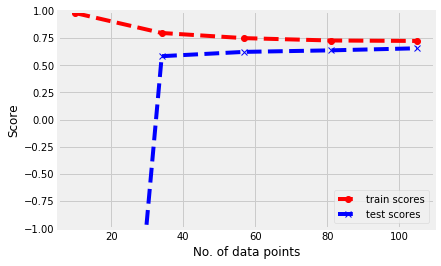

In [47]:
train_sizes, train_scores, test_scores = learning_curve(baseball_log, X, y_t, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

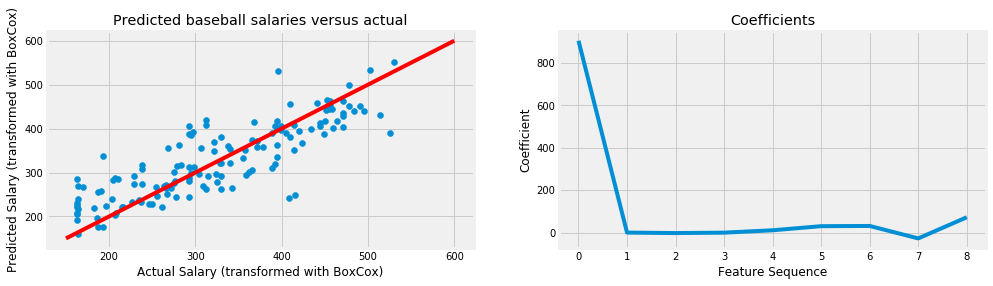

In [48]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_log_predicted = baseball_log.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_t, y_train_log_predicted)
plt.plot([150, 600], [150, 600], color='red')
plt.title('Predicted baseball salaries versus actual')
plt.ylabel('Predicted Salary (transformed with BoxCox)')
plt.xlabel('Actual Salary (transformed with BoxCox)');

plt.subplot(1, 2, 2)
plt.plot(baseball_log.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [49]:
py, pX = patsy.dmatrices('y_t ~ RBI +'
                                'OBP + Age + Total_games_played +'
                                'dWAR + rootASC + First_Base +  Second_Base +'
                                'DH',
                       data=final_train, return_type="dataframe")

boxcoxmodel = sm.OLS(py, pX)
boxcoxfit = boxcoxmodel.fit()
boxcoxfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     36.80
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           9.49e-32
Time:                        13:34:57   Log-Likelihood:                -761.73
No. Observations:                 141   AIC:                             1543.
Df Residuals:                     131   BIC:                             1573.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.8911     80.229      0.323      0.747    -132.821     184.603
RBI                    0.8351      0.374      2.230      0.027       0.094       1.576
OBP                  574.1195    222.211      2.584      0.011     134.533    1013.706
Age                   -1.7792      1.898     -0.937      0.350      -5.535       1.976
Total_games_played     0.1577      0.031      5.170      0.000       0.097       0.218
dWAR                  13.6009      7.069      1.924      0.057      -0.383      27.585
rootASC               29.1199      9.450      3.081      0.003      10.425      47.815
First_Base            25.8374     16.679      1.549      0.124      -7.158      58.833
Second_Base          -25.2553     14.800     -1.706      0.090     -54.534       4.023
DH                    74.3098     24.989      2.974      0.004      24.876     123.744
==============================================================================
Omnibus:                        3.690   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                4.096
Skew:                           0.116   Prob(JB):                        0.129
Kurtosis:                       3.802   Cond. No.                     3.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

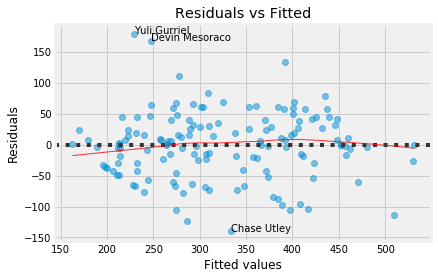

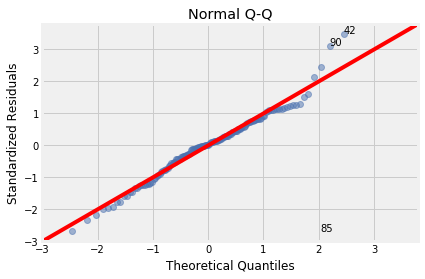

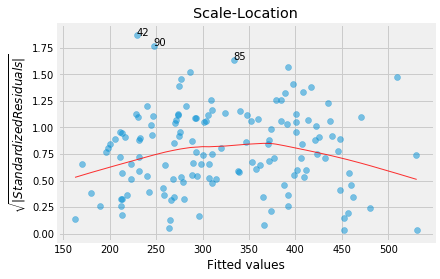

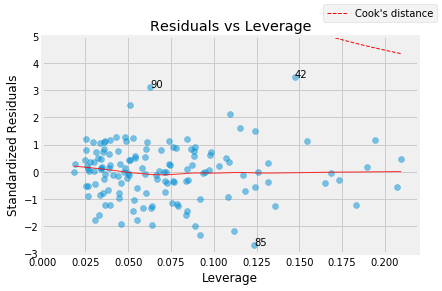

In [50]:
diagnostic_plots.diagnostic_plots(pX, py, boxcoxfit)
plt.figsize=(20,10)

In [51]:
## RETRAIN ON X_train, Y_train
## THEN TEST ON X_FINALTEST, Y_FINALTEST

In [52]:
X_FINALtrain.shape

(141, 33)

In [53]:
## CHANGE THIS TO FINAL FEATURES

X_FINALtrain = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [54]:
y_FINALtrain.shape

(141,)

In [55]:
## CHANGE THIS TO FINAL FEATURES

X_FINALTEST = X_FINALTEST[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [56]:
X_FINALTEST.shape

(61, 9)

In [57]:
y_FINALTEST.shape

(61,)

In [58]:
def regression_scores(x,y):
    Final_mse_scores =[]
    final_r2_scores = []
    y_test_predict = baseball_log.predict(x)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y, lamb))
    rmse = score**0.5
    Final_mse_scores.append(rmse)
    r2 = r2_score(y_test_predict, y)
    final_r2_scores.append(r2)

    y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
    salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']
    plt.subplot(1, 1, 1)
    plt.scatter(inv_boxcox(y, lamb), inv_boxcox(y_test_predict, lamb))
    
    
    plt.title('Predicted baseball salaries versus actual')
    plt.ylabel('Predicted Salary')
    plt.xlabel('Actual Salary')
    plt.yticks(y_ticks, salaries)
    plt.xticks(y_ticks, salaries, rotation=30)
    plt.plot([0, 3e7], [0, 3e7], color='red');
    
    mean_mse = np.mean(Final_mse_scores)
    return ('Mean RMSE', np.mean(Final_mse_scores), 'Mean R^2',np.mean(final_r2_scores))

In [59]:
baseball_log.fit(X_FINALtrain, y_FINALtrain)

print(baseball_log.score(X_FINALtrain, y_FINALtrain))
print(baseball_log.score(X_FINALTEST, y_FINALTEST))

0.716596422379376
0.5721591593243018


('Mean RMSE', 4096244.5445069135, 'Mean R^2', 0.6045143838708912)

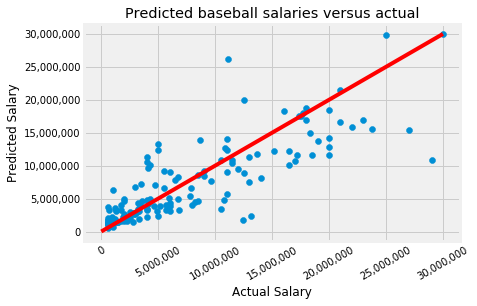

In [60]:
regression_scores(X_FINALtrain,y_FINALtrain)

('Mean RMSE', 5639591.382262989, 'Mean R^2', 0.5284678920318701)

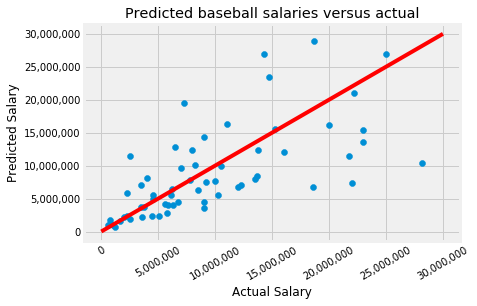

In [61]:
regression_scores(X_FINALTEST,y_FINALTEST)

In [62]:
training_df.reset_index(inplace=True)

In [63]:
Giancarlo = training_df[training_df['Player_Name'] == 'Giancarlo Stanton']

Giancarlo[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH', 'Salary']]

OBP        RBI  Age  Total_games_played      dWAR  rootASC  \
81  0.360754  87.571429   27                 886 -0.042857      2.0   

    First_Base  Second_Base   DH      Salary  
81         0.0          0.0  1.0  25000000.0

In [64]:
Giancarlo = Giancarlo[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [65]:
inv_boxcox(baseball_log.predict(Giancarlo), lamb)

array([29848072.48697415])

In [66]:
baseball_log.predict(Giancarlo)

array([529.77359384])

In [67]:
## WHAT WILL RAISING YOUR OBP BY 0.100 DO TO SALARY

inv_boxcox(574, lamb) / 10

3915530.1024334542

In [68]:
## TRY OTHER MODELS BELOW

In [69]:
from sklearn import linear_model,ensemble, tree, model_selection, datasets

def get_scores(X, y, folds = 10, alpha = 0.5): 

    models = {}
    parameters = {}
    
    models['ridge_model'] = linear_model.Ridge()
    models['lasso_model'] = linear_model.Lasso(alpha=alpha)
    models['robust_regression'] = linear_model.SGDRegressor(loss='huber',max_iter=2000)
    models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',max_iter=2000)
    models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
    models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
    models['randomForest'] = ensemble.RandomForestRegressor()
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()
    
    score_list = []
    for name,model in models.items():
        scores = model_selection.cross_val_score(model, X, y, 
                                                 cv = folds, n_jobs=1, scoring="r2")  
        score_list.append(np.mean(scores))

    scores_df = pd.DataFrame({'Model': list(models.keys()),
                             'Scores': score_list})

    return scores_df

In [70]:
get_scores(X_FINALtrain, y_FINALtrain)

Model    Scores
0        ridge_model  0.569777
1        lasso_model  0.565377
2  robust_regression  0.475552
3    eps_insensitive -3.079501
4               cart  0.229093
5         extratrees  0.228297
6       randomForest  0.507611
7    adaboostedTrees  0.523468
8   gradboostedTrees  0.511894

In [71]:
get_scores(X_FINALTEST, y_FINALTEST)

Model     Scores
0        ridge_model   0.309270
1        lasso_model   0.289323
2  robust_regression  -0.065685
3    eps_insensitive -14.164602
4               cart   0.033018
5         extratrees  -0.117213
6       randomForest   0.413576
7    adaboostedTrees   0.403192
8   gradboostedTrees   0.210049